## Закрепление знаний по очистке данных

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


#### Признаки в данных
* Pregnancies — количество беременностей.

* Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

* BloodPressure — диастолическое артериальное давление (мм рт. ст.).

* SkinThickness — толщина кожной складки трицепса (мм).

* Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

* BMI — индекс массы тела.

* DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

* Age — возраст.

* Outcome — наличие диабета (0 — нет, 1 — да).

---

### Задание 8.1
* Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [132]:
dupl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dupl_columns)   # ищем дубликаты по всем столбцам
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_duplicates

Число найденных дубликатов: 10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
768,6,98,58,33,190,34.0,0.430,43,0,Female
769,2,112,75,32,0,35.7,0.148,21,0,Female
770,2,108,64,0,0,30.8,0.158,21,0,Female
771,8,107,80,0,0,24.6,0.856,34,0,Female
772,7,136,90,0,0,29.9,0.210,50,0,Female
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


In [133]:
diabetes_dedupped= diabetes.drop_duplicates(subset=dupl_columns)   # создаём копию таблицы без дубликатов
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


---

### Задание 8.2
* Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.99: удалите все признаки, для которых 99 % значений повторяются или 99 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [134]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [135]:
diabetes_data = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_data.shape[1]}')

Результирующее число признаков: 9


---

### Задание 8.3
* Попробуйте найти пропуски в данных с помощью метода insull().
* Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
* Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [136]:
# display(diabetes_data)      # Меняем в выбранных столбцах нули на NaN
# diabetes_data.info()
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols] = diabetes_data[cols].replace(0, np.nan)
display(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [137]:
cols_null_percent = diabetes_data.isnull().mean()       # находим столбцы с пропущенными данными
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          0.486979
SkinThickness    0.295573
BloodPressure    0.045573
BMI              0.014323
Glucose          0.006510
dtype: float64

---

### Задание 8.4
* Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [138]:
drop_diabetes_data = diabetes_data.copy()     #создаем копию исходной таблицы
thresh = drop_diabetes_data.shape[0]*0.7      #задаем минимальный порог: вычисляем 70% от числа строк
drop_diabetes_data = drop_diabetes_data.dropna(how='any', thresh=thresh, axis=1)  #удаляем столбцы, в которых более 30% (100-70) пропусков
display(drop_diabetes_data.isnull().mean())            #отображаем результирующую долю пропусков
display(drop_diabetes_data.shape)

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

(768, 8)

---

### Задание 8.5
* Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [139]:
drop_diabetes_data = drop_diabetes_data.dropna(thresh=drop_diabetes_data.shape[1]-2, axis=0)   #удаляем записи, в которых есть хотя бы 1 пропуск
display(drop_diabetes_data.shape)
display(drop_diabetes_data.info())

(761, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


None

---

### Задание 8.6
* В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [140]:
#создаем копию исходной таблицы
fill_diabetes_data = drop_diabetes_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Pregnancies': fill_diabetes_data['Pregnancies'].median(),
    'Glucose': fill_diabetes_data['Glucose'].median(),
    'BloodPressure': fill_diabetes_data['BloodPressure'].median(),
    'SkinThickness': fill_diabetes_data['SkinThickness'].median(),
    'BMI': fill_diabetes_data['BMI'].median(),
    'DiabetesPedigreeFunction': fill_diabetes_data['DiabetesPedigreeFunction'].median(),
    'Age': fill_diabetes_data['Age'].median(),
    'Outcome': fill_diabetes_data['Outcome'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
fill_diabetes_data = fill_diabetes_data.fillna(values)

round(fill_diabetes_data['SkinThickness'].mean(),1)

29.1

---

### Задание 8.7
* Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [141]:
def outliers_iqr(data, feature):   # Функция для нахождения потенциальных выбросов по методу Тьюки
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(fill_diabetes_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


---

### Задание 8.8
* На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
* Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [142]:
outliers, cleaned = outliers_iqr(fill_diabetes_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [143]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:                                 # Функция очистки выбросов по методу Z-отклонения 
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(fill_diabetes_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


---

### Одно из заданий из вопросов на собеседовании

In [144]:
data_parsing = pd.read_excel('data/Data_TSUM.xlsx','Data_Parsing')   # Считываем два листа из экселя в две базы
data_company = pd.read_excel('data/Data_TSUM.xlsx','Data_Company')

In [145]:
data_parsing.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


In [146]:
data_company.head()

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [147]:
data_parsing['producer_color'].value_counts()

~~~red      33
white_~     21
black        9
bla//ck      3
bla\\ck      3
bla__ck      3
bla\\c~k     3
Name: producer_color, dtype: int64

In [148]:
def preobr_str(string1):
    for sim in '_-~\/':
        string1 = string1.replace(sim,'')
    return string1

data_parsing_mod = data_parsing.copy()
data_parsing_mod['producer_color'] = data_parsing['producer_color'].apply(preobr_str)
data_parsing_mod['producer_id'] = data_parsing['producer_id'].apply(preobr_str)
# display(data_parsing['producer_color'].value_counts())
# data_parsing_mod['producer_color'].value_counts()
data_parsing_mod

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [149]:
data_company_mod = data_company[['item_id', 'color_id', 'current price']]
data_company_mod

,item_id,color_id,current price
0,aaaaa111111,black,247
1,aaaaa111112,black,161
2,aaaaa111113,black,234
3,aaaaa111114,black,167
4,aaaaa111115,black,153
...,...,...,...
70,sssss111131,red,165
71,sssss111132,red,196
72,sssss111133,red,236
73,sssss111134,red,222


In [150]:
data_merge = data_parsing_mod.merge(
    data_company_mod,
    how='left',
    left_on=['producer_id', 'producer_color'],
    right_on=['item_id', 'color_id']
)
data_merge

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


In [151]:
data_merge['price_procent'] = round(data_merge['price'] / data_merge['current price'] * 100)
data_merge

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_procent
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,68.0
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,117.0
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,79.0
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.0
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.0
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.0
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,81.0
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.0
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.0


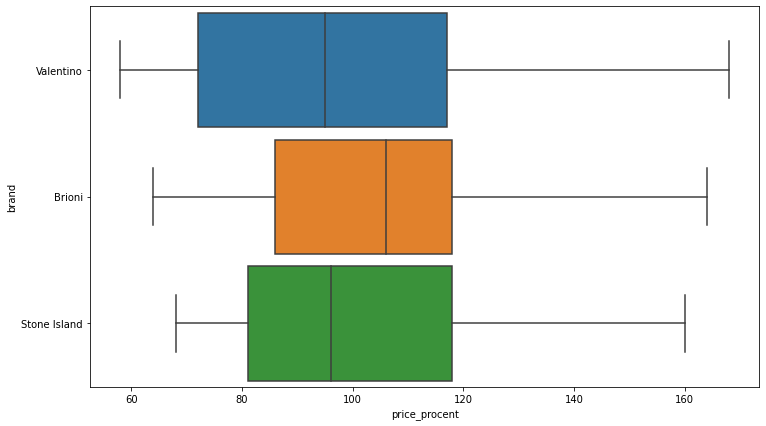

In [152]:
fig = plt.figure(figsize=(12, 7))
boxplot = sns.boxplot(
    data=data_merge,
    y='brand',
    x='price_procent',
    orient='h',
    width=0.9
)

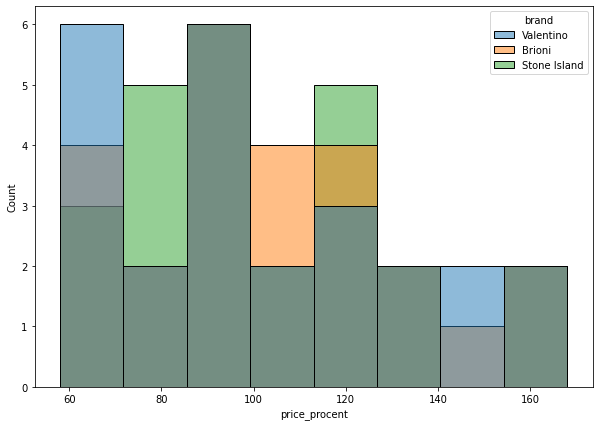

In [153]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.histplot(
    data=data_merge,
    x='price_procent',
    hue='brand',
#    orient='h',
#    width=0.9
)

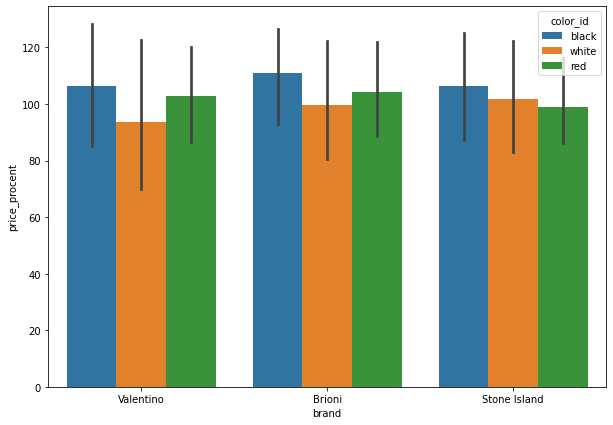

In [154]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=data_merge,
    x='brand',
    y='price_procent',
    hue='color_id',
)

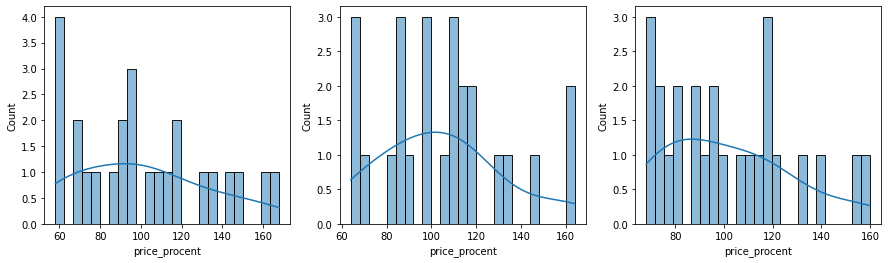

In [155]:
data_merge_brand_v = data_merge[data_merge['brand'] == 'Valentino']  
data_merge_brand_b = data_merge[data_merge['brand'] == 'Brioni']  
data_merge_brand_s = data_merge[data_merge['brand'] == 'Stone Island']  

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.histplot(data=data_merge_brand_v, x='price_procent', kde=True, bins = 25, ax=axes[0])
sns.histplot(data=data_merge_brand_b, x='price_procent', kde=True, bins = 25, ax=axes[1])
sns.histplot(data=data_merge_brand_s, x='price_procent', kde=True, bins = 25, ax=axes[2]);

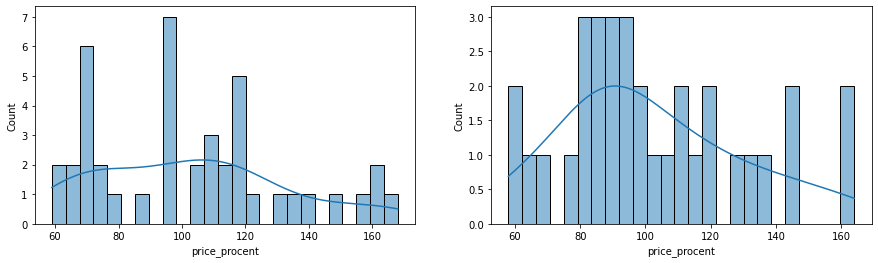

In [156]:
data_merge_category_s = data_merge[data_merge['Category'] == 'Shoes']  
data_merge_category_b = data_merge[data_merge['Category'] == 'Bags']  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.histplot(data=data_merge_category_s, x='price_procent', kde=True, bins = 25, ax=axes[0])
sns.histplot(data=data_merge_category_b, x='price_procent', kde=True, bins = 25, ax=axes[1]);

In [157]:
data_merge['price_procent'].describe()

count     75.000000
mean     102.626667
std       28.754682
min       58.000000
25%       81.500000
50%       96.000000
75%      118.000000
max      168.000000
Name: price_procent, dtype: float64

In [158]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    """
    Давайте немного модифицируем нашу функцию outliers_iqr(). 
    Добавьте в нее параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
    Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
    """
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [159]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:                                 # Функция очистки выбросов по методу Z-отклонения 
        x = np.log(data[feature]+1)               # с дополнительными параметрами
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

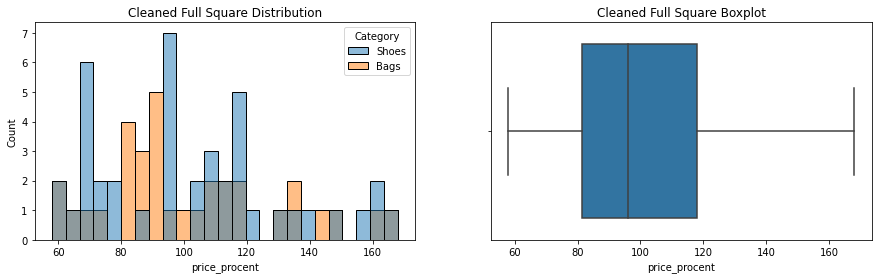

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data_merge, x='price_procent', hue='Category', bins = 25, ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=data_merge, x='price_procent', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [161]:
outliers, cleaned = outliers_iqr_mod(data_merge, 'price_procent',0.5 ,0.5)   # Изменим границы метода Тьюки
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
outliers.head()

Число выбросов по методу Тьюки: 14
Результирующее число записей: 61


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_procent
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.0
7,Valentino,Shoes,aaaaa111118,white,162,aaaaa111118,white,265,61.0
10,Valentino,Shoes,aaaaa111121,white,171,aaaaa111121,white,292,59.0
12,Valentino,Shoes,aaaaa111123,white,288,aaaaa111123,white,171,168.0
16,Valentino,Bags,aaaaa111127,red,293,aaaaa111127,red,203,144.0


In [162]:
outliers_z, cleaned_z = outliers_z_score_mod(data_merge, 'price_procent', 0.8, 0.8, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers_z.shape[0]}')
print(f'Результирующее число записей: {cleaned_z.shape[0]}')
outliers.head()

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 42


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_procent
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.0
7,Valentino,Shoes,aaaaa111118,white,162,aaaaa111118,white,265,61.0
10,Valentino,Shoes,aaaaa111121,white,171,aaaaa111121,white,292,59.0
12,Valentino,Shoes,aaaaa111123,white,288,aaaaa111123,white,171,168.0
16,Valentino,Bags,aaaaa111127,red,293,aaaaa111127,red,203,144.0


In [163]:
mask = outliers_z.index                       # Большие отклонения цен обозначим 'Yes' в столбце 'outlier'
for d_index in data_merge.index:
    if d_index in mask:
        data_merge.loc[d_index,'outlier'] = 'Yes'
#    else:
#        data_merge.loc[d_index,'outlier'] = 'No'

#data_merge

In [164]:
data_merge.to_excel('data/Data_TSUM_mod.xlsx', sheet_name='Data_merge', index=False)